# Disaster Tweet Classification with RNN Models

#### For this competition, we will be trying to classify tweets based on whether they are about a natural disaster or not. 
#### We'll build an RNN using the Tensorflow library and compare different architectures (Vanilla, LSTM, GRU, etc) as well as explore different embedding techniques to see if we can boost performance. 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import re
import string
import subprocess

import keras
import nltk.corpus
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

try: 
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
[nltk_data] Downloading package wordnet to /kaggle/working/...


# EDA

## Data Exploration

#### First, we'll import the data and get some summary statistics about it. We'll also take a look at some example tweets from each class and figure out our plan of attack

In [2]:
train_path = '../input/nlp-getting-started/train.csv'
test_path = '../input/nlp-getting-started/test.csv'

train_raw = pd.read_csv(train_path)
test_raw = pd.read_csv(test_path)

In [3]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
train_raw.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
positive_examples = train_raw[train_raw['target'] == 1]
negative_examples = train_raw[train_raw['target'] == 0]

positive_examples['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [6]:
negative_examples['text'].head()

15                  What's up man?
16                   I love fruits
17                Summer is lovely
18               My car is so fast
19    What a goooooooaaaaaal!!!!!!
Name: text, dtype: object

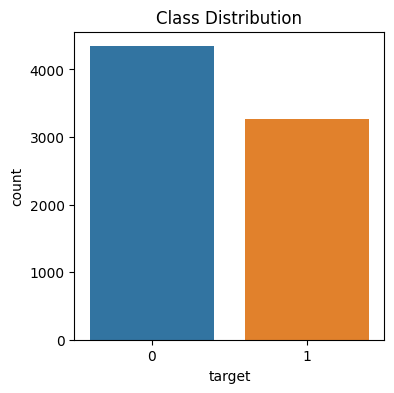

In [7]:
plt.figure(figsize=(4, 4))
sns.countplot(x='target', data=train_raw)
plt.title('Class Distribution')
plt.show()

## Analysis Plan

#### After looking through the data at a high-level, we can figure out a few different things that we need to do. The target classes aren't perfectly symmetrical but they are split roughly 60/40 so class imbalance shouldn't be a huge issue. We'll proceed through a few steps as we model:
* #### Our first step will be to clean the data -- this will include things like stripping out URLs and Stop-words, cleaning up repeated letters (check the 5th example in our negative classes above), and removing punctuation
* #### Next, we'll tokenize the input tweets, breaking them down into tokens for easier training
* #### We'll have to adress embedding schemes after tokenizing the data. We'll start with TF-IDF, and possibly try Word2Vec, and the built-in Tensorflow Embeddings Layer
* #### After we have the data processed, we'll fit a vanilla RNN to the data and test the performance.
* #### Once our baseline is established, we'll try other RNN architectures like LSTM, GRU, Bi-Directional
* #### Whichever base architecture performs the best, we'll run some hyperparameter tuning on to fine-tune it
* #### Once we've trained what we feel is our best model, we'll compare results and discuss what we've learned

# Data Cleaning and Pre-processing

## Cleaning Tweets

#### We'll create a few methods to handle stripping out punctuation, URLs, and stopwords. We'll also lemmatize the text here instead of tokenizing. We'll cover what our tokenization approach is in the next block

In [8]:
def clean_and_prep_text(df_text: pd.DataFrame):
    '''
    Given an input dataframe, transform the text column
    '''
    lemmatizer = WordnetLemmatizer()
    urlstr = re.compile(r"https?://\S+|www\.\S+")
    punctrans = str.maketrans("", "", string.punctuation)
    stop_set = set(stopwords.words("english"))
    
    df_text['no_url'] = df_text['text'].apply(lambda row: urlstr.sub(r"", row)) 
    df_text['no_punc'] = df_text['no_url'].apply(lambda row: row.translate(punctrans))
    df_text['clean'] = df_text['no_punc'].apply(lambda row: ' '.join([word for word in row.split() if word not in stop_set]))
    df_text['lemmas'] = df_text['clean'].apply(lambda row: ' '.join([lemmatizer.lemmatize(word) for word in row.split()]))

    df_text.drop(['no_url', 'no_punc', 'clean'], axis=1, inplace=True)

    return
    

## Tokenization

## Embedding the Text

# Model Building and Training

## Basic Architecture

## Training and Exploring Results

## Hyperparameter Tuning and Other Architectures

# Submissions and Results

## Comparing Models

## Conclusions